# LeNet Classifier using PyTorch
### MNIST Dataset Used


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time

In [ ]:
# define constants
NUM_EPOCHS = 10
BATCH_SIZE = 4
LEARNING_RATE = 0.001

https://discuss.pytorch.org/t/understanding-transform-normalize/21730


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [ ]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                             download=True, 
                                             transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                            download=True, 
                                            transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                          shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
classes = ('0','1','2','3','4','5',
           '6','7','8','9')

torch.Size([4, 1, 28, 28])
torch.Size([4])


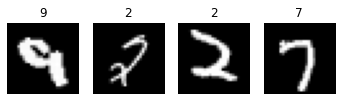

In [ ]:
for batch_1 in trainloader:
    batch = batch_1
    break
print(batch[0].shape) # as batch[0] contains the image pixels -> tensors
print(batch[1].shape) # batch[1] contains the labels -> tensors
plt.figure(figsize=(12, 8))
for i in range (batch[0].shape[0]):
    plt.subplot(4, 8, i+1)
    plt.axis('off')
    plt.imshow(batch[0][i].reshape(28, 28), cmap='gray')
    plt.title(classes[batch[1][i]])
    plt.savefig('Mnist.png')
plt.show()

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        #super(LeNet, self).__init__()
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, 
                               kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, 
                               kernel_size=5)
        self.fc1 = nn.Linear(in_features=256, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
# loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [ ]:
# if GPU is available, then use GPU, else use CPU
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
#print(device)
#net.to(device)

In [ ]:
# function to calculate accuracy
def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        #inputs, labels = data[0].to(device), data[1].to(device)
        inputs, labels = data[0], data[1]
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)

In [ ]:
def train():
    epoch_loss = []
    train_acc = []
    test_acc = []
    for epoch in range(NUM_EPOCHS):
        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            #inputs, labels = data[0].to(device), data[1].to(device)
            inputs, labels = data[0], data[1]
            # set parameter gradients to zero
            optimizer.zero_grad()
            # forward pass
            outputs = net(inputs)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss.append(running_loss/15000)
        train_acc.append(calc_acc(trainloader))
        test_acc.append(calc_acc(testloader))
        print('Epoch: %d of %d, Train Acc: %0.3f, Test Acc: %0.3f, Loss: %0.3f'
              % (epoch+1, NUM_EPOCHS, train_acc[epoch], test_acc[epoch], running_loss/15000))
        
    return epoch_loss, train_acc, test_acc

In [ ]:
start = time.time()
epoch_loss, train_acc, test_acc = train()
end = time.time()
print('%0.2f minutes' %((end - start) / 60))

Epoch: 1 of 10, Train Acc: 97.830, Test Acc: 98.010, Loss: 0.257
Epoch: 2 of 10, Train Acc: 98.395, Test Acc: 98.230, Loss: 0.063
Epoch: 3 of 10, Train Acc: 98.970, Test Acc: 98.560, Loss: 0.045
Epoch: 4 of 10, Train Acc: 99.172, Test Acc: 98.760, Loss: 0.036
Epoch: 5 of 10, Train Acc: 99.368, Test Acc: 98.950, Loss: 0.030
Epoch: 6 of 10, Train Acc: 99.167, Test Acc: 98.700, Loss: 0.024
Epoch: 7 of 10, Train Acc: 99.638, Test Acc: 99.110, Loss: 0.022
Epoch: 8 of 10, Train Acc: 99.333, Test Acc: 98.790, Loss: 0.018
Epoch: 9 of 10, Train Acc: 99.720, Test Acc: 98.970, Loss: 0.015
Epoch: 10 of 10, Train Acc: 99.512, Test Acc: 98.840, Loss: 0.015
11.30 minutes
